In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import warnings

warnings.filterwarnings(action='ignore', category=FutureWarning)

In [2]:
sns.set_style('whitegrid')

#to print summary of cross validation score
def score_summary(scores):
    print('cv_scores: ',scores)
    print('mean: ', np.mean(scores))
    print('std. deviation:',np.std(scores))
    
#to save visualisations as png images
def save_figure(fig_id):
    path = os.path.join('iris_image_' + fig_id + '.png')
    plt.savefig(path, dpi=300, format='png')


In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
#label encoder로 품종 이름을 label로 추가
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder().fit(iris.target_names)

df['Species'] = le.inverse_transform(iris.target)
df['Species'].value_counts()


setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

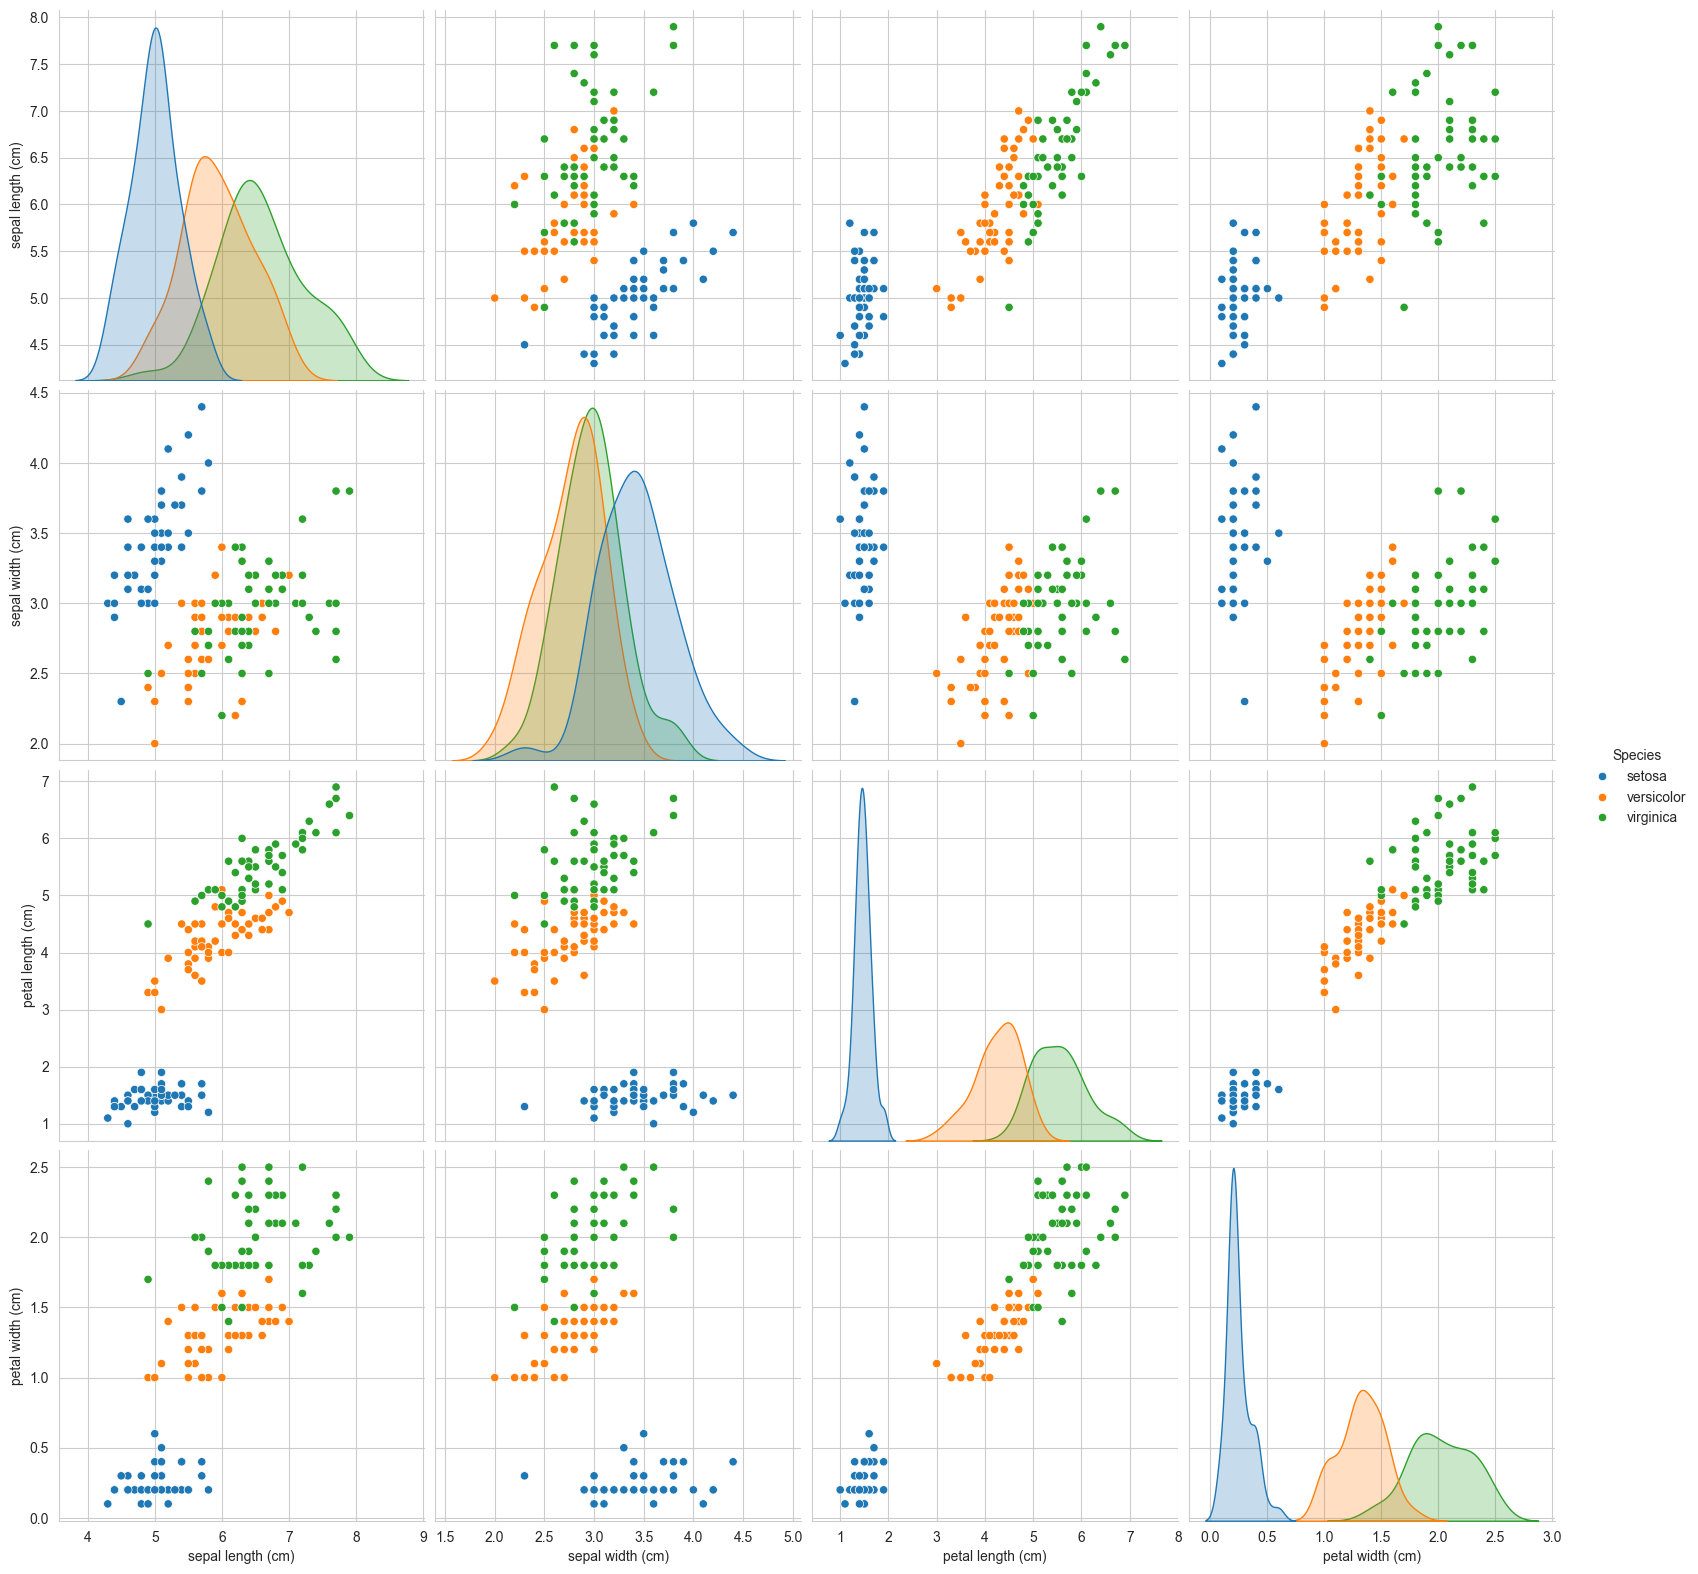

In [6]:
sns.pairplot(df, height=4, hue='Species')
save_figure('1')

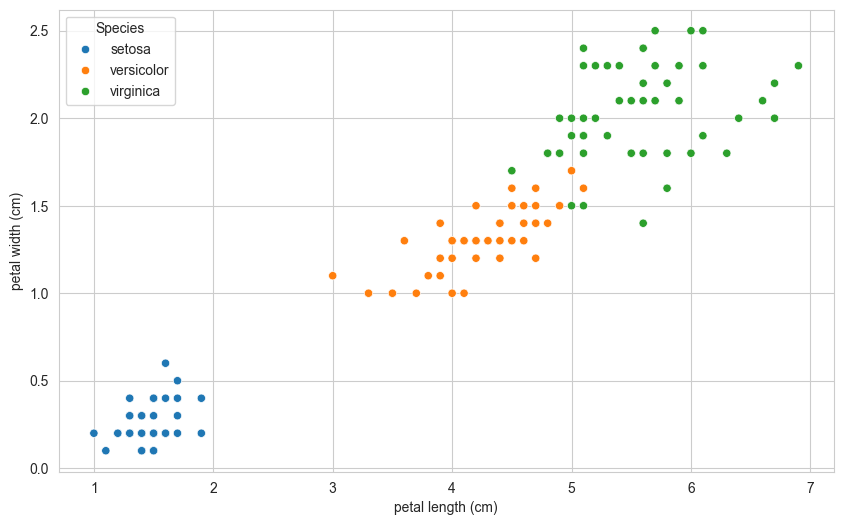

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='Species')
save_figure('2')

In [10]:
X = iris.data[:, 2:]
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc_clf = SVC(gamma='auto')
svc_clf.fit(X_train, y_train)
svc_clf.scores=cross_val_score(svc_clf, X_train, y_train, cv=5)
score_summary(svc_clf.scores)


cv_scores:  [0.95833333 0.95833333 0.95833333 0.95833333 1.        ]
mean:  0.9666666666666668
std. deviation: 0.016666666666666653


In [12]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(X, y, classifier, resolution = 0.02):

    #마커와 컬러맵을 설정
    markers = ('s', 'p', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #결정 경계를 그림
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x = X[y == c1, 0],
                    y = X[y == c1, 1],
                    alpha = 0.8,
                    c=colors[idx],
                    marker = markers[idx],
                    label = c1,
                    edgecolor = 'black')


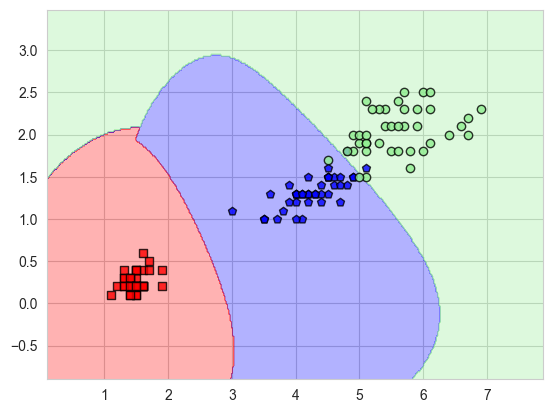

In [13]:
plot_decision_regions(X=X_train, y=y_train, classifier=svc_clf)
save_figure('3')

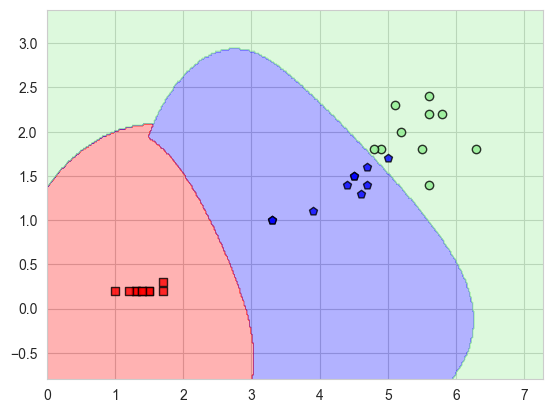

In [14]:
plot_decision_regions(X=X_test, y=y_test, classifier=svc_clf)
save_figure('4')

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'C':[8,9,10,11,12,15],
    'gamma':[.01,.02,0.05, .001]
}

grid = GridSearchCV(svc_clf, param_grid, cv=30)
grid.fit(X_train, y_train)

GridSearchCV(cv=30, estimator=SVC(gamma='auto'),
             param_grid={'C': [8, 9, 10, 11, 12, 15],
                         'gamma': [0.01, 0.02, 0.05, 0.001]})

In [16]:
scores_df = pd.DataFrame(grid.cv_results_)
scores_df[['rank_test_score', 'params', 'mean_test_score']]

,rank_test_score,params,mean_test_score
0,1,"{'C': 8, 'gamma': 0.01}",0.966667
1,19,"{'C': 8, 'gamma': 0.02}",0.950000
2,4,"{'C': 8, 'gamma': 0.05}",0.958333
3,1,"{'C': 8, 'gamma': 0.001}",0.966667
4,4,"{'C': 9, 'gamma': 0.01}",0.958333
5,19,"{'C': 9, 'gamma': 0.02}",0.950000
6,4,"{'C': 9, 'gamma': 0.05}",0.958333
7,19,"{'C': 9, 'gamma': 0.001}",0.950000
8,1,"{'C': 10, 'gamma': 0.01}",0.966667
9,19,"{'C': 10, 'gamma': 0.02}",0.950000


In [18]:
grid.best_params_

{'C': 8, 'gamma': 0.01}

In [19]:
grid.best_score_

0.9666666666666667

In [20]:
best_model = grid.best_estimator_

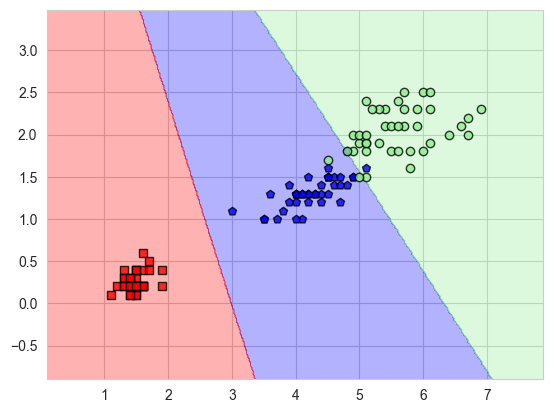

In [21]:
plot_decision_regions(X=X_train, y=y_train, classifier=best_model)
save_figure('5')

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


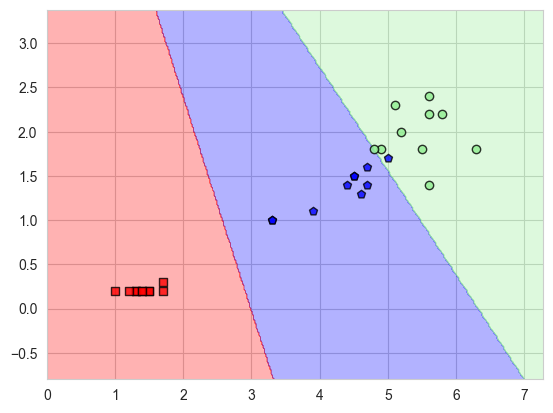

In [22]:
from sklearn.metrics import confusion_matrix
svc_pred = svc_clf.predict(X_test)
print(confusion_matrix(y_test, svc_pred))
plot_decision_regions(X=X_test, y=y_test, classifier=best_model)
save_figure('6')